In [12]:
import numpy as np
from strlearn.streams import StreamGenerator
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
from strlearn.streams import StreamGenerator


stream = StreamGenerator(
  n_classes=2,
  n_features=2,
  n_informative=2,
  n_redundant=0,
  n_repeated=0,
  random_state=105,
  n_chunks=50,
  chunk_size=100,
  n_drifts=5
)

X,y = [],[]

for _ in range(50):
    x,yy = stream.get_chunk()
    X.append(x)
    y.append(yy)

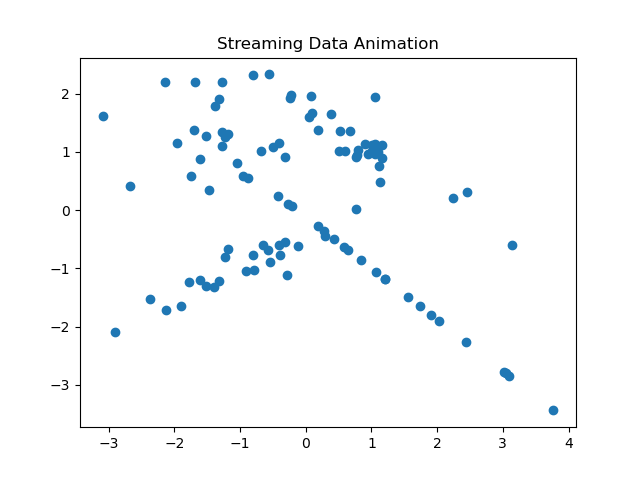

In [3]:
%matplotlib ipympl
fig, ax = plt.subplots()
sc = ax.scatter(x=X[0][:,0],y=X[0][:,1])  
ax.set_title("Streaming Data Animation")



def update(frame):
    x_plot = X[frame+1]
    y_plot =y[frame+1]
   # data = np.stack([x_plot[:,0],x_plot[:,1],y_plot]).T
    sc.set_offsets(x_plot)
    sc.set_array(y_plot)
    return sc,


ani = animation.FuncAnimation(fig, func=update, frames=49, interval=1000)

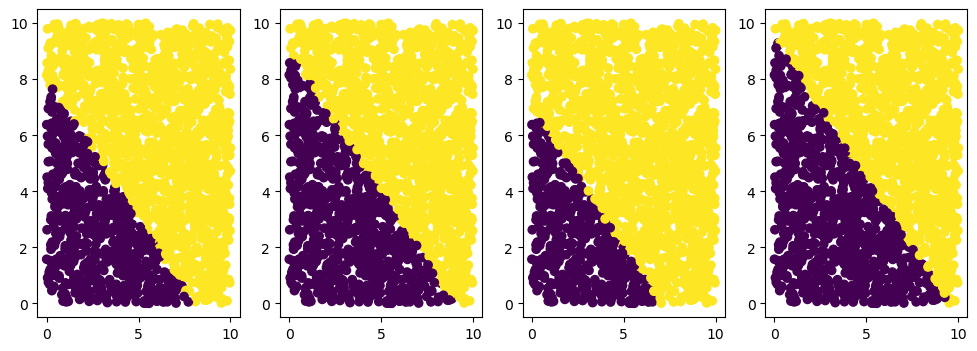

In [21]:
from river.datasets import synth


fig,ax = plt.subplots(1,4,figsize=(12,4))
for variant in range(4):
    dataset = synth.SEA(variant=variant, seed=42)

    C1 = []
    yc1 = []
    for x, y in dataset.take(2000):
        C1.append(list(x.values()))
        yc1.append(1*y)

    DATA = np.vstack(C1)

    ax[variant].scatter(DATA[:,0],DATA[:,1],c=yc1)


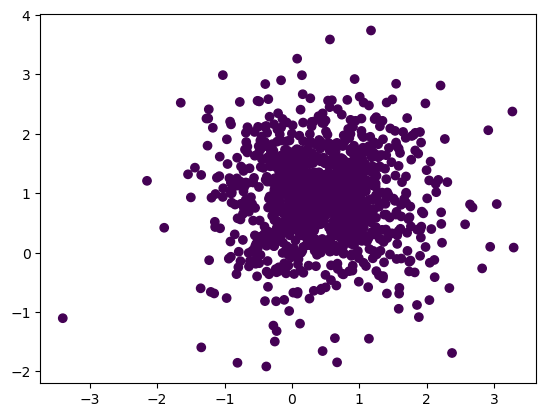

In [ ]:
dataset = synth.RandomRBFDrift(seed_model=0, seed_sample=4,
                               n_classes=3, n_features=2, n_centroids=2,
                               change_speed=0.0, n_drift_centroids=1)


X,yrbf = [],[]
for x, y in dataset.take(5000):
    X.append(list(x.values()))
    yrbf.append(y)

DATA = np.vstack(X)

plt.scatter(DATA[:,0],DATA[:,1],c=yrbf)